In [1]:
import plotly.plotly as py
import plotly.graph_objs as go

from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/tooth_growth_csv')

In [37]:
df = data[:10]

In [33]:
data.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [36]:
data['supp'].value_counts()

VC    30
OJ    30
Name: supp, dtype: int64

In [4]:
formula = 'len ~ C(supp)+C(dose)+C(supp):C(dose)'
model = ols(formula,data).fit()
aov_table = statsmodels.stats.anova.anova_lm(model,typ=2)
print(aov_table)

                      sum_sq    df          F        PR(>F)
C(supp)           205.350000   1.0  15.571979  2.311828e-04
C(dose)          2426.434333   2.0  91.999965  4.046291e-18
C(supp):C(dose)   108.319000   2.0   4.106991  2.186027e-02
Residual          712.106000  54.0        NaN           NaN


In [5]:
# https://pythonfordatascience.org/anova-python/
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/difficile.csv")
df.head()

,person,dose,libido
0,1,1,3
1,2,1,2
2,3,1,1
3,4,1,1
4,5,1,4


In [7]:
df.drop('person',axis=1,inplace=True)

In [8]:
df['dose'].replace({1:'placebo',2:'low',3:'high'},inplace=True)

In [9]:
df.head()

,dose,libido
0,placebo,3
1,placebo,2
2,placebo,1
3,placebo,1
4,placebo,4


In [10]:
rp.summary_cont(df['libido'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,libido,15.0,3.466667,1.76743,0.456349,2.487896,4.445437


In [11]:
rp.summary_cont(df['libido'].groupby(df['dose']))

,N,Mean,SD,SE,95% Conf.,Interval
dose,,,,,,
high,5,5.0,1.581139,0.707107,3.450484,6.549516
low,5,3.2,1.303840,0.583095,1.922236,4.477764
placebo,5,2.2,1.303840,0.583095,0.922236,3.477764


In [12]:
# ANOVA with scipy.stats
stats.f_oneway(df['libido'][df['dose']=='high'],
              df['libido'][df['dose']=='low'],
              df['libido'][df['dose']=='placebo'])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

The F-statistic= 5.119 and the p-value= 0.025 which is indicating that there is an overall significant effect of medication on libido. However, we don’t know where the difference between dosing/groups is yet. 

### ANOVA with statsmodels

model_name = ols('outcome_variable ~ group1 + group2 + groupN', data=your_data).fit()

model_name = ols('outcome_variable ~ C(group_variable)', data=your_data).fit()

In [13]:
results = ols('libido ~ C(dose)',data=df).fit()
results.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=15



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Tue, 07 May 2019   Prob (F-statistic):             0.0247
Time:                        10:11:49   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.0000      0.627      7.972      0.000       3.634       6.366
C(dose)[T.low]        -1.8000      0.887     -2.029      0.065      -3.732       0.132
C(dose)[T.placebo]    -2.8000      0.887     -3.157      0.008      -4.732      -0.868
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.108
Skew:                           0.195   Prob(JB):                        0.575
Kurtosis:                       1.727   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let’s interpret the table. Overall the model is significiant, F(2,12)= 5.12, p = 0.0247. This tells us that there is a significant difference in the group means. The coefficients (coef in the table), are the difference in mean between the control group and the respective group listed. The intercept is the mean for the high dose group, placebo group’s coefficient = 2.2 – 5.0 = -2.8, and low dose coefficient = 3.2 – 5.0 = -1.8. Looking at the p-values now (P>|t| in the table), we can see the difference between the high dose group and placebo group is significant, p = 0.008, but the difference between the low dose group and high dose group is not, p = 0.065. There is no comparison between the low dose group and the placebo group. I wanted to show you this to see where these numbers come from. Coming from the ANOVA framework, the information we are really after in this table it the F-statistic and it’s corresponding p-value. This tells us if we explained a significant amount of the overall variance. To test between groups, we need to do some post-hoc testing where we can compare all groups against each other. We are still missing some useful information with this method, we need an ANOVA table.

In [14]:
aov_table = sm.stats.anova_lm(results,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


Let’s break down this ANOVA table. The dose row is the between groups effect which is the overall experimental effect. The sum of squares for the model (SSM; value 20.133 in the table) is how much variance is explained by our model. The current model explains a significant amount of variance, F(2,12)= 5.12, p < 0.05. The residual row is the unsystematic variation in the data (SSR; also called the unexplained variance; value 23.600 in the table). In this case, the unsystematic variation represents the natural individual differences in libido and natural different reactions to the drug, Difficile.

R2 and eta squared = SSM/SST
R2 and eta squared = 20.133/43.733 = 0.460

In [15]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov


In [16]:
anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(dose),20.133333,2.0,10.066667,5.118644,0.024694,0.460366,0.354486
Residual,23.600000,12.0,1.966667,NaN,NaN,NaN,NaN


In [17]:
results.diagn

{'jb': 1.108027577642525,
 'jbpv': 0.5746386969445544,
 'skew': 0.19458085550133966,
 'kurtosis': 1.726659006032749,
 'omni': 2.517358660775962,
 'omnipv': 0.2840288872319992,
 'condno': 3.732050807568878,
 'mineigval': 1.339745962155613}

The Durban-Watson tests is to detect the presence of autocorrelation (not provided when calling diagnostics this way), Jarque-Bera (jb; jbpv is p-value) tests the assumption of normality, Omnibus (omni; omnipv is p-value) tests the assumption of homogeneity of variance, and the Condition Number (condno) assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity.

### Assumption: Homogeneity of Variance
One can use the Levene’s test to test for equal variances between groups. This is apart of the scipy.stats library. Official documentation can be found here. The reason I prefer using these methods is that the homogeneity of variance assumption should be checked for each level of the categorical variable. The diagnostic output provided by statsmodels appears to only test it as the whole.



In [18]:
stats.levene(df['libido'][df['dose']=='placebo'],
            df['libido'][df['dose']=='low'],
            df['libido'][df['dose']=='high'])

LeveneResult(statistic=0.11764705882352934, pvalue=0.8900225182757423)

Levene’s test for homogeneity of variance is not significant which indicates that the groups have equal variances.

### Assumption: Normality


The assumption of normality is tested on the residuals as a whole which is how the diagnostic information provided by statsmodels tests the residuals. One could use the Jarque-Bera test provided, or one could use Shapiro or others. I will demonstrate how to test for normality using the Shapiro method. The output is not labelled, but the numbers are the test statistic value followed by the p-value. The official documentation can be found here.



In [19]:
stats.shapiro(results.resid)

(0.916691780090332, 0.1714704930782318)

The results from the Shapiro-Wilk test is not statistically significant which indicates that the residuals are normally distributed.

## Post-hoc Testing

#### TUKEY’S HSD POST-HOC COMPARISON

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['libido'],df['dose'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1  group2 meandiff  lower   upper  reject
----------------------------------------------
 high    low     -1.8   -4.1651  0.5651 False 
 high  placebo   -2.8   -5.1651 -0.4349  True 
 low   placebo   -1.0   -3.3651  1.3651 False 
----------------------------------------------


#### BONFERRONI CORRECTION POST-HOC COMPARISON

In [21]:
stats.ttest_ind(df['libido'][df['dose']=='high'],
                df['libido'][df['dose']=='low'])

Ttest_indResult(statistic=1.963961012123931, pvalue=0.08513507177899203)

In [22]:
stats.ttest_ind(df['libido'][df['dose']=='low'],
               df['libido'][df['dose']=='placebo'])



Ttest_indResult(statistic=1.2126781251816647, pvalue=0.2598450452137845)

In [23]:
stats.ttest_ind(df.query("dose == 'low'")['libido'],
               df.query("dose == 'placebo'")['libido'])

Ttest_indResult(statistic=1.2126781251816647, pvalue=0.2598450452137845)

In [24]:
stats.ttest_ind(df['libido'][df['dose']=='high'],
               df['libido'][df['dose']=='placebo'])

Ttest_indResult(statistic=3.0550504633038926, pvalue=0.015700141250047695)

In [25]:
import pingouin as pg

In [26]:
# Let's assume that we have a balanced design with 30 students in each group
n = 30
months = ['August','January','June']

# Generate random data
np.random.seed(1234)
control = np.random.normal(5.5, size=len(months) * n)
meditation = np.r_[ np.random.normal(5.4, size=n),
                    np.random.normal(5.8, size=n),
                    np.random.normal(6.4, size=n) ]

# Create a dataframe
df = pd.DataFrame({'Scores': np.r_[control, meditation],
                   'Time': np.r_[np.repeat(months, n), np.repeat(months, n)],
                   'Group': np.repeat(['Control', 'Meditation'], len(months) * n),
                   'Subject': np.r_[np.tile(np.arange(n), 3),
                                    np.tile(np.arange(n, n + n), 3)]})

In [27]:
df.isnull().sum()

Scores     0
Time       0
Group      0
Subject    0
dtype: int64

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



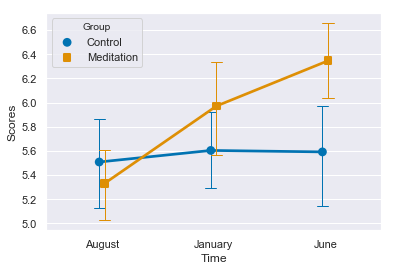

In [28]:
import seaborn as sns
sns.set()
sns.pointplot(data=df,x='Time',y='Scores',hue='Group',dodge=True,
             markers=['o','s'],capsize=.1,errwidth=1,palette='colorblind')

In [29]:
df.groupby(['Time','Group'])['Scores'].agg(['mean','std']).round(2)

mean   std
Time    Group                 
August  Control     5.51  1.03
        Meditation  5.33  0.81
January Control     5.60  0.90
        Meditation  5.97  1.07
June    Control     5.59  1.18
        Meditation  6.35  0.93

### ANOVA with Mixed Design

In [30]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='Scores', within='Time', between='Group', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)

TypeError: 'NoneType' object is not callable

In [ ]:
posthocs = pg.pairwise_ttests(dv='Scores', within='Time', between='Group', subject='Subject', 
                              data=df)

In [ ]:
pg.print_table(posthocs)

1. T-test

In [ ]:
import numpy as np
import pingouin as pg

np.random.seed(123)
mean,cov,n=[4,5],[(1,.6),(.6,1)],30
x,y = np.random.multivariate_normal(mean,cov,n).T

### 1.T-test

In [ ]:
pg.ttest(x,y)

### 2.Pearson's correlation

In [ ]:
pg.corr(x,y)

### 3.Robust correlation

In [ ]:
# Introduce an outlier
x[5] = 18
# Use the robust Shepherd's pi correlation
pg.corr(x,y,method='shepherd')

### 4.Test the normality of the data

In [ ]:
# Return a boolean (true if normal) and the associated p-value
print(pg.normality(x,y))  # Univariate normality
print(pg.multivariate_normality(np.column_stack((x,y))))  # Multivariate normality

### 5. One-way ANOVA using a pandas DataFrame

In [ ]:
# read an example dataset
df = pg.read_dataset('mixed_anova')

In [ ]:
# Run the ANOVA
aov = pg.anova(data=df,dv='Scores',between='Group',detailed=True)
print(aov)

### 6. Repeated measures ANOVA

In [ ]:
pg.rm_anova(data=df,dv='Scores',within='Time',subject='Subject',detailed=True)

In [ ]:
df.head()

### 7. Post-hoc tests corrected for multiple-comparisons

In [ ]:
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_ttests(data=df,dv='Scores',within='Time',subject='Subject',
                           parametric=True,padjust='fdr_bh',effsize='hedges')
# Pretty printing of table
pg.print_table(posthoc,floatfmt='.3f')

### 8. Two-way mixed ANOVA

In [ ]:
# Compute the two-way mixed ANOVA and export to a .csv file
aov = pg.mixed_anova(data=df,dv='Scores',between='Group',within='Time',
                    subject='Subject',correction=False,
                    export_filename='mixed_anova.csv')
pg.print_table(aov)

### 9. Pairwise correlations between columns of a dataframe

In [ ]:
np.random.seed(123)
z = np.random.normal(5,1,30)
data = pd.DataFrame({'X':x,'Y':y,'Z':z})
pg.pairwise_corr(data,columns=['X','Y','Z'])

### 10. Convert between effect sizes

In [ ]:
# Convert between Cohen's d to Hedges' g
pg.convert_effsize(0.4,'cohen','hedges',nx=10,ny=12)

### 11.Multiple linear regression

In [ ]:
pg.linear_regression(data[['X','Z']],data['Y'])

### 12.Mediation analysis

In [ ]:
pg.mediation_analysis(data=data,x='X',m='Z',y='Y',seed=42,n_boot=1000)

In [40]:
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [57]:
from random import sample
temp = df.loc[sample(list(df.index),3)]

In [58]:
temp

,len,supp,dose
4,6.4,VC,0.5
7,11.2,VC,0.5
9,7.0,VC,0.5


In [59]:
temp2 = df.loc[sample(list(df.index),3)]

In [64]:
all = pd.concat([temp,temp2])

In [65]:
al

,len,supp,dose
4,6.4,VC,0.5
7,11.2,VC,0.5
9,7.0,VC,0.5
4,6.4,VC,0.5
2,7.3,VC,0.5
1,11.5,VC,0.5


In [ ]:
def sampling_by_weights(df,var):
    vars = df[var].uniques()
    for v in vars:
        